<a href="https://colab.research.google.com/github/ZeinabMetwally/CodeAlpha-Task4-Heart-Attack-Prediction/blob/main/Heart_Attack_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report ,confusion_matrix

In [45]:
#read data
heart_df=pd.read_csv('/content/drive/MyDrive/Heart Attack Prediction/heart.csv')

#Show Data

In [46]:
heart_df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [47]:
#from data card
dict_names = {
    'age': 'Age',
    'sex': 'Sex',
    'cp': 'Chest_Pain',
    'trtbps': 'Resting_Pressure',
    'chol': 'Cholesterol',
    'fbs': 'Fasting_Blood_Sugar',
    'restecg': 'Resting_Ecg_Results',
    'thalachh': 'Maximum_Heart_Rate',
    'exng': 'Exercise_Induced_Angina',
    'oldpeak': 'Old_Peak',
    'slp': 'Slope',
    'caa': 'Major_Vessels',
    'thall': 'Thallium_Rate',
    'output': 'Target'
}

In [48]:
# rename the columns
for column in heart_df.columns:
    if column in dict_names:
        heart_df.rename(columns={column: dict_names[column]}, inplace=True)
heart_df.head()

,Age,Sex,Chest_Pain,Resting_Pressure,Cholesterol,Fasting_Blood_Sugar,Resting_Ecg_Results,Maximum_Heart_Rate,Exercise_Induced_Angina,Old_Peak,Slope,Major_Vessels,Thallium_Rate,Target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [49]:
heart_df.shape

(303, 14)

In [50]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      303 non-null    int64  
 1   Sex                      303 non-null    int64  
 2   Chest_Pain               303 non-null    int64  
 3   Resting_Pressure         303 non-null    int64  
 4   Cholesterol              303 non-null    int64  
 5   Fasting_Blood_Sugar      303 non-null    int64  
 6   Resting_Ecg_Results      303 non-null    int64  
 7   Maximum_Heart_Rate       303 non-null    int64  
 8   Exercise_Induced_Angina  303 non-null    int64  
 9   Old_Peak                 303 non-null    float64
 10  Slope                    303 non-null    int64  
 11  Major_Vessels            303 non-null    int64  
 12  Thallium_Rate            303 non-null    int64  
 13  Target                   303 non-null    int64  
dtypes: float64(1), int64(13)
m

In [51]:
heart_df.describe()

,Age,Sex,Chest_Pain,Resting_Pressure,Cholesterol,Fasting_Blood_Sugar,Resting_Ecg_Results,Maximum_Heart_Rate,Exercise_Induced_Angina,Old_Peak,Slope,Major_Vessels,Thallium_Rate,Target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [52]:
heart_df.isnull().sum()

Age                        0
Sex                        0
Chest_Pain                 0
Resting_Pressure           0
Cholesterol                0
Fasting_Blood_Sugar        0
Resting_Ecg_Results        0
Maximum_Heart_Rate         0
Exercise_Induced_Angina    0
Old_Peak                   0
Slope                      0
Major_Vessels              0
Thallium_Rate              0
Target                     0
dtype: int64

In [53]:
heart_df.duplicated().sum()

1

In [54]:
heart_df.drop_duplicates(inplace=True)
heart_df.shape

(302, 14)

#Age Coulmn

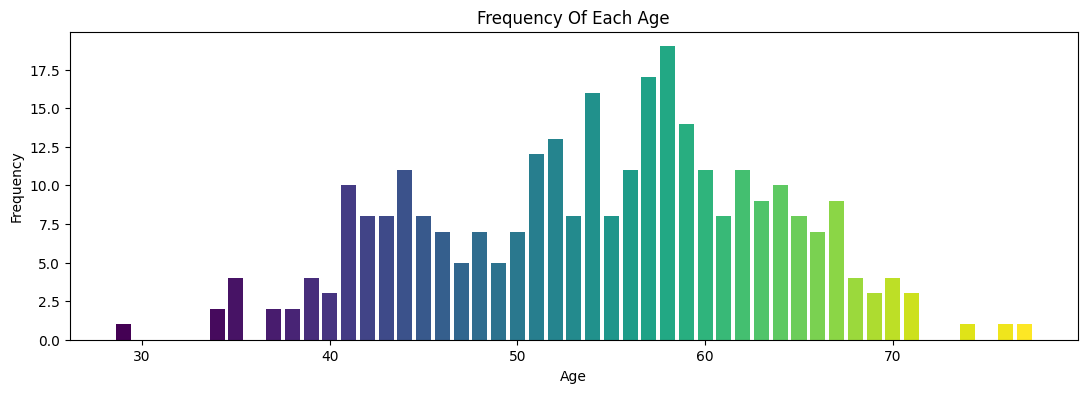

In [55]:
plt.figure(figsize=(13,4))
age_counts = heart_df['Age'].value_counts().sort_index()
plt.bar(age_counts.index, age_counts.values, color=plt.cm.viridis(np.linspace(0, 1, len(age_counts))))
plt.title('Frequency Of Each Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#Heart Rate

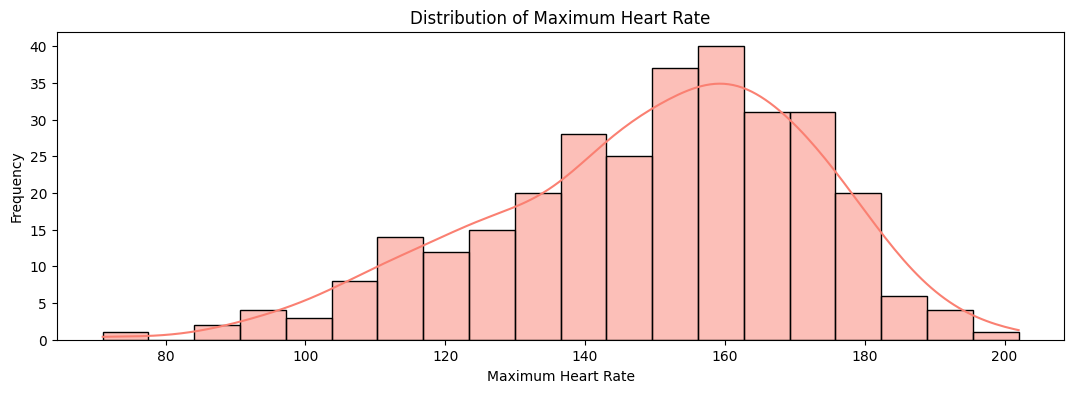

In [56]:
plt.figure(figsize=(13,4))
sns.histplot(heart_df['Maximum_Heart_Rate'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Maximum Heart Rate')
plt.xlabel('Maximum Heart Rate')
plt.ylabel('Frequency')
plt.show()

#Sex

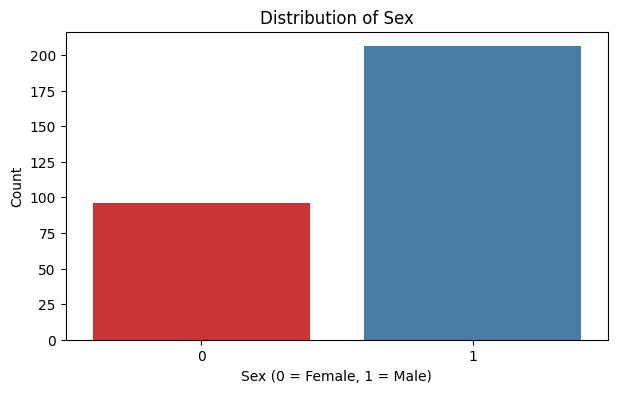

In [57]:
plt.figure(figsize=(7,4))
sns.countplot(x='Sex', data=heart_df, palette='Set1')
plt.title('Distribution of Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.show()

#Chest Pain

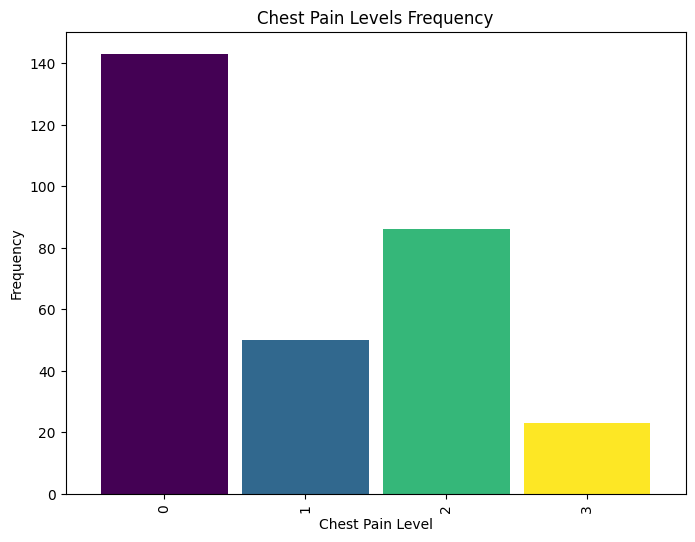

In [58]:
plt.figure(figsize=(8, 6))
chest_pain_counts = heart_df['Chest_Pain'].value_counts().sort_index()
colors = plt.cm.viridis(np.linspace(0, 1, len(chest_pain_counts)))
ax = chest_pain_counts.plot(kind='bar', width=0.9, color=colors)
ax.set_title('Chest Pain Levels Frequency')
ax.set_xlabel('Chest Pain Level')
ax.set_ylabel('Frequency')
plt.show()

# Resting Pressure

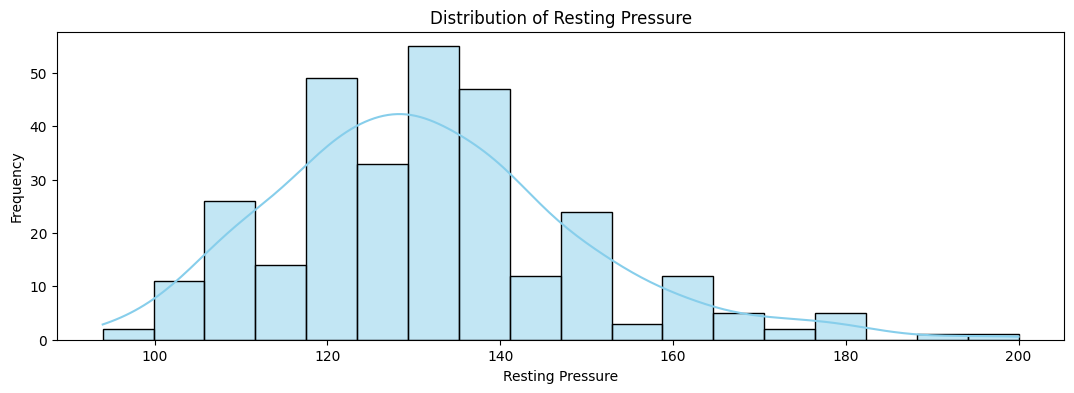

In [59]:
plt.figure(figsize=(13, 4))
sns.histplot(heart_df['Resting_Pressure'], kde=True, color='skyblue')
plt.title('Distribution of Resting Pressure')
plt.xlabel('Resting Pressure')
plt.ylabel('Frequency')
plt.show()

#Cholesterol Level

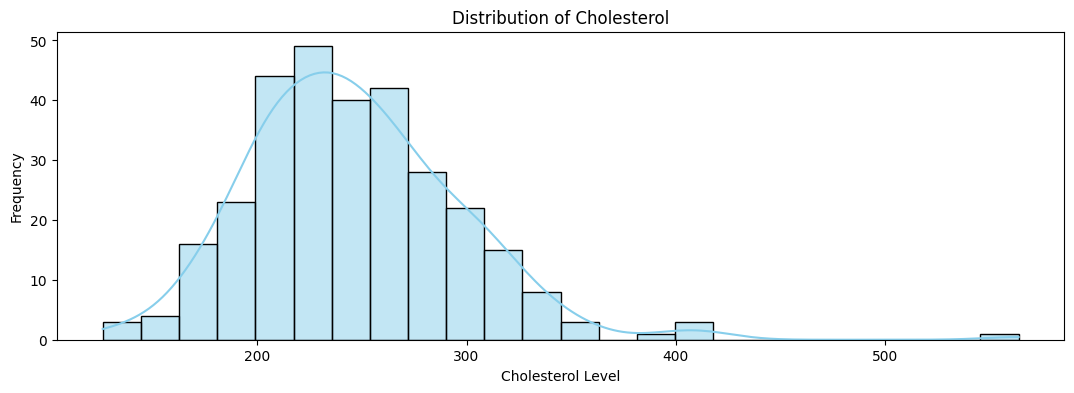

In [60]:
plt.figure(figsize=(13, 4))
sns.histplot(heart_df['Cholesterol'], kde=True, color='skyblue')
plt.title('Distribution of Cholesterol')
plt.xlabel('Cholesterol Level')
plt.ylabel('Frequency')
plt.show()

#split data

In [61]:
x = heart_df.drop(columns=['Target'])
y = heart_df['Target']

In [62]:
x.shape

(302, 13)

In [63]:
y.shape

(302,)

In [64]:
#data scaling
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#RandomForest model

In [84]:
rf_model = RandomForestClassifier(n_estimators= 100)
rf_model.fit(x_train, y_train)

RandomForestClassifier()

In [85]:
y_pred = rf_model.predict(x_test)

In [88]:
accuracy_rf = accuracy_score(y_test, y_pred)
accuracy_rf

0.8524590163934426

In [89]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [90]:
cm1 = confusion_matrix(y_test,y_pred)

Text(95.72222222222221, 0.5, 'Truh')

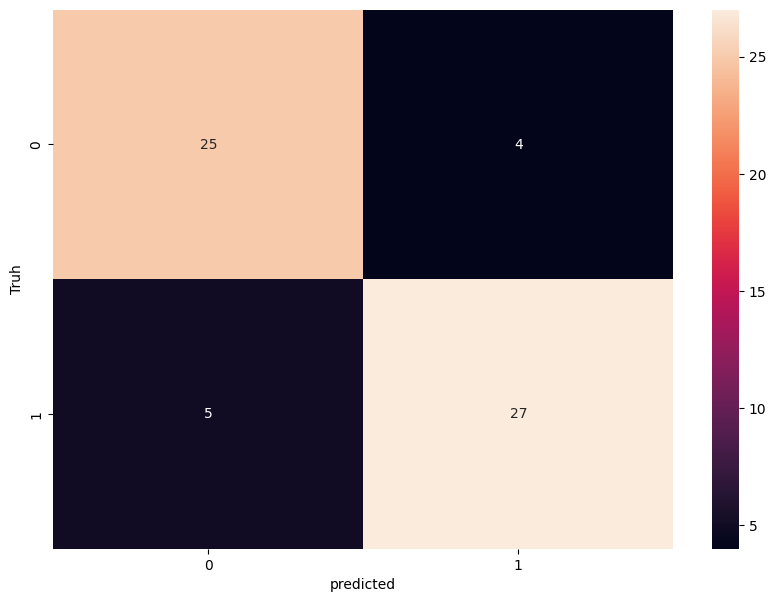

In [91]:
plt.figure(figsize=(10,7))
sns.heatmap(cm1,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truh')

#Logistic Model

In [92]:
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [93]:
y_pred = logistic_model.predict(x_test)

In [94]:
accuracy_logistic = accuracy_score(y_test, y_pred)
accuracy_logistic

0.819672131147541

In [95]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81        29
           1       0.84      0.81      0.83        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



Text(95.72222222222221, 0.5, 'Truh')

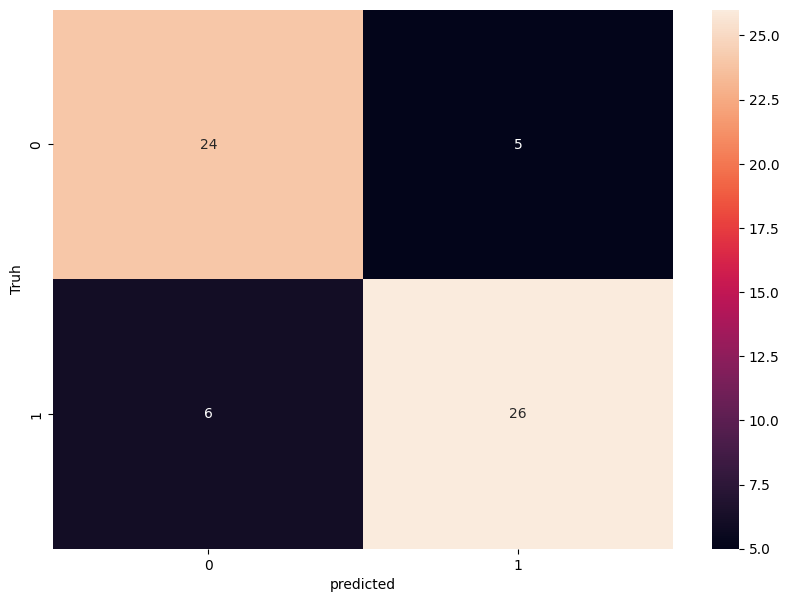

In [96]:
cm1 = confusion_matrix(y_test,y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm1,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truh')

#Decision Tree model

In [97]:
dr_model= DecisionTreeClassifier()
dr_model.fit(x_train , y_train)

DecisionTreeClassifier()

In [98]:
y_pred = dr_model.predict(x_test)

In [99]:
accuracy_dr = accuracy_score(y_test, y_pred)
accuracy_dr

0.8032786885245902

In [100]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81        29
           1       0.86      0.75      0.80        32

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.81      0.80      0.80        61



Text(95.72222222222221, 0.5, 'Truh')

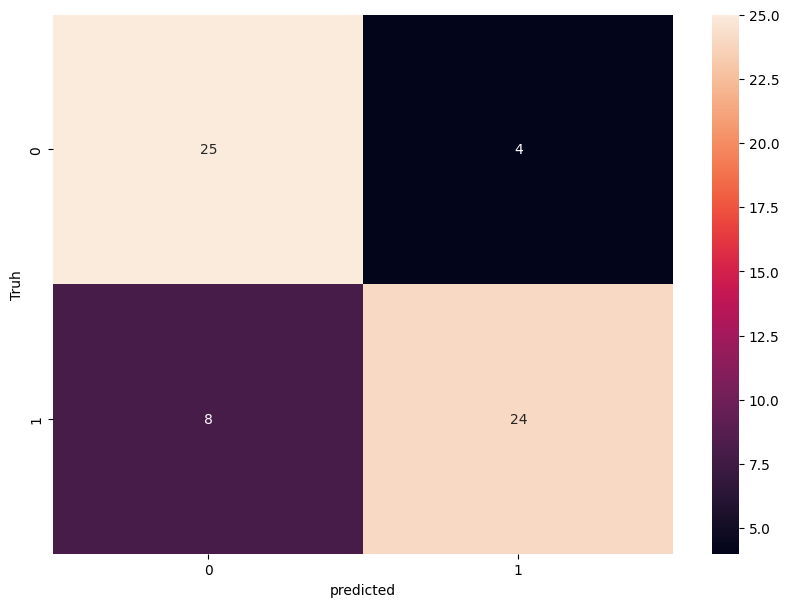

In [101]:
cm1 = confusion_matrix(y_test,y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm1,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truh')

#SVM Model

In [102]:
svm_model=SVC()
svm_model.fit(x_train , y_train)

SVC()

In [103]:
y_pred =svm_model.predict(x_test)

In [104]:
accuracy_svm = accuracy_score(y_test , y_pred)
accuracy_svm

0.8688524590163934

In [105]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87        29
           1       0.93      0.81      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



Text(95.72222222222221, 0.5, 'Truh')

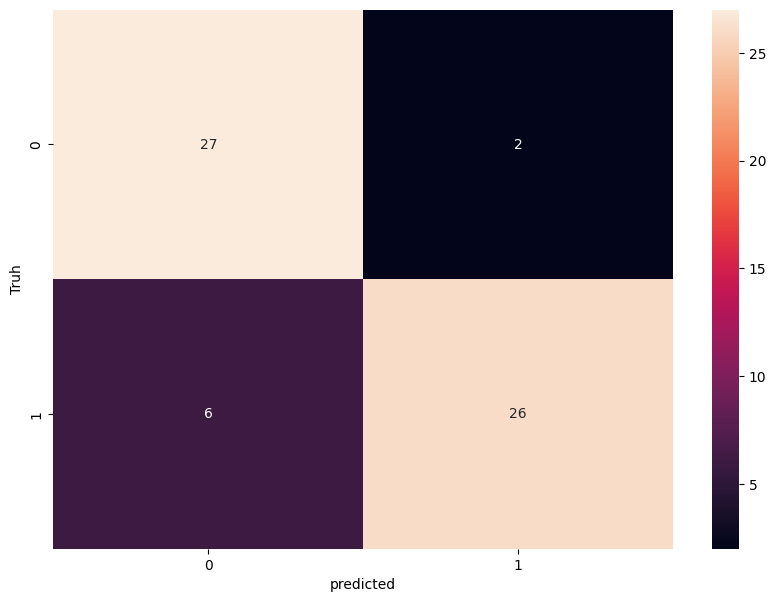

In [106]:
cm1 = confusion_matrix(y_test,y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm1,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truh')

#KNN Model

In [107]:
knn_model=KNeighborsClassifier()
knn_model.fit(x_train , y_train)

KNeighborsClassifier()

In [108]:
y_pred=knn_model.predict(x_test)

In [109]:
accuracy_knn=accuracy_score(y_test , y_pred)
accuracy_knn

0.9180327868852459

In [110]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92        29
           1       0.97      0.88      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



Text(95.72222222222221, 0.5, 'Truh')

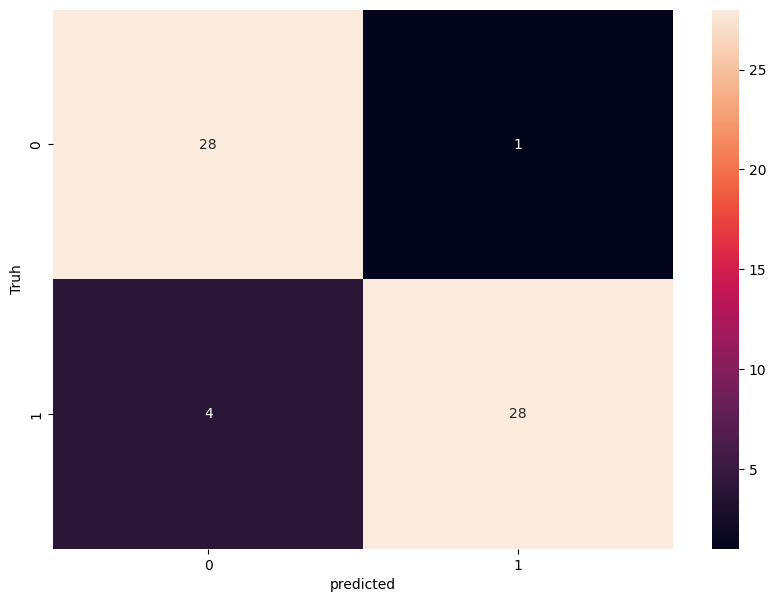

In [111]:
cm1 = confusion_matrix(y_test,y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm1,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truh')